✅ Dataset Loaded Successfully!
Shape: (2000, 10)

Sample:


,Degree,Major,Skill1,Skill2,Certification,ExperienceYears,ProjectCount,Internship,ExperienceLevel,JobRole
0,MBA,Computer Science,SQL,Python,AI Specialist,13,3,No,Expert,Data Analyst
1,M.Tech,Electronics,Java,Java,Cybersecurity,7,5,Yes,Senior,Security Analyst
2,B.Tech,Electronics,Machine Learning,SQL,Data Analytics,8,4,Yes,Senior,ML Engineer
3,MCA,Data Science,Java,C++,AI Specialist,9,1,Yes,Senior,Data Analyst
4,M.Tech,Electronics,Data Analysis,C++,AI Specialist,10,9,Yes,Senior,Data Analyst



Categorical Columns: ['Degree', 'Major', 'Skill1', 'Skill2', 'Certification', 'Internship', 'ExperienceLevel']
Numerical Columns: ['ExperienceYears', 'ProjectCount']

📘 Logistic Regression Results:
Training Accuracy: 97.25%
Testing Accuracy:  94.50%
Classification Report:
                    precision    recall  f1-score   support

       AI Engineer       0.14      0.14      0.14         7
  Business Analyst       1.00      0.89      0.94         9
    Cloud Engineer       1.00      1.00      1.00        14
      Data Analyst       0.95      0.91      0.93       117
    Data Scientist       1.00      1.00      1.00        35
       ML Engineer       1.00      1.00      1.00       165
  Security Analyst       1.00      1.00      1.00        22
Software Developer       0.72      0.84      0.78        31

          accuracy                           0.94       400
         macro avg       0.85      0.85      0.85       400
      weighted avg       0.95      0.94      0.95       400


📘 

,Model,Training Accuracy (%),Testing Accuracy (%)
7,XGBoost,100.00,96.25
6,Gradient Boosting,100.00,95.25
0,Logistic Regression,97.25,94.50
3,SVM,100.00,93.00
4,Random Forest,98.94,88.50
2,Decision Tree,85.44,84.25
5,AdaBoost,71.19,69.00
1,KNN,100.00,67.25



🏆 Best Model: XGBoost
✅ Training Accuracy: 100.0%
✅ Testing Accuracy: 96.25%


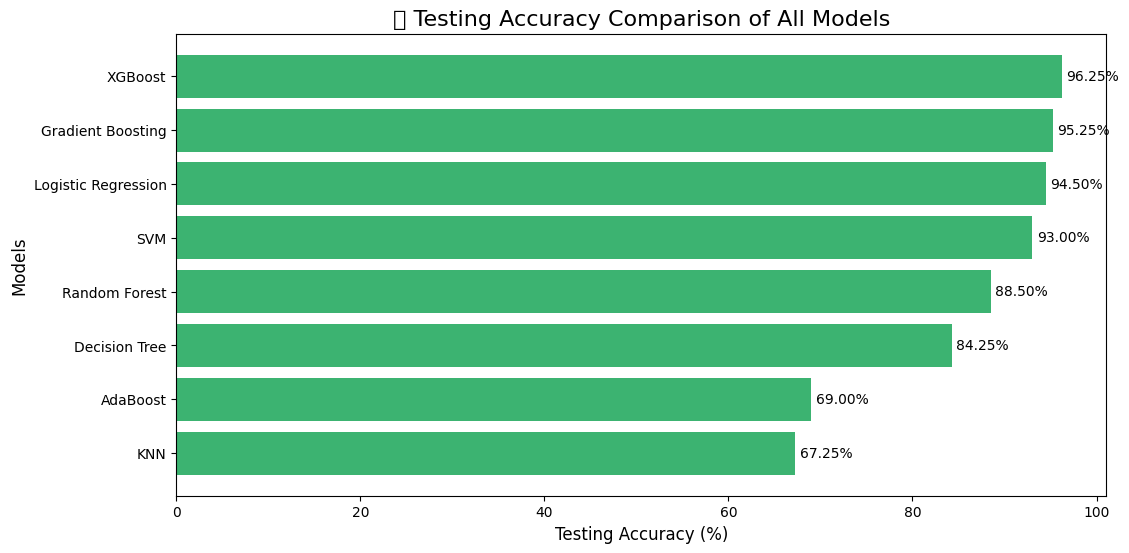


🎯 Sample Input Prediction:
Predicted Job Role: Data Analyst


In [10]:
# ==========================================================
# 🎯 JOB ROLE PREDICTION USING 8 ML MODELS + VISUALIZATION
# ==========================================================

# ✅ Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# ✅ Step 2: Load dataset
data_path = "/content/final_high_accuracy_job_dataset.csv"  # Update if needed
df = pd.read_csv(data_path)

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nSample:")
display(df.head())

# ✅ Step 3: Define features & target
target_col = "JobRole"
X = df.drop(columns=[target_col])
y = df[target_col]

# ✅ Step 4: Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

# ✅ Step 5: Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ]
)

# ✅ Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 7: Encode target
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# ✅ Step 8: Define ML Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000, C=3),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights="distance"),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "SVM": SVC(kernel="rbf", C=5, probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=12, random_state=42, n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(n_estimators=150, learning_rate=0.8, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.08, max_depth=5, random_state=42),
    "XGBoost": xgb.XGBClassifier(
        n_estimators=250,
        learning_rate=0.1,
        max_depth=6,
        eval_metric="mlogloss",
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    )
}

# ✅ Step 9: Train & Evaluate All Models
results = []
trained_models = {}

for name, model in models.items():
    clf = Pipeline(steps=[("pre", preprocessor), ("model", model)])
    clf.fit(X_train, y_train_enc)
    trained_models[name] = clf

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_acc = accuracy_score(y_train_enc, y_train_pred)
    test_acc = accuracy_score(y_test_enc, y_test_pred)

    results.append({
        "Model": name,
        "Training Accuracy (%)": round(train_acc * 100, 2),
        "Testing Accuracy (%)": round(test_acc * 100, 2)
    })

    print(f"\n📘 {name} Results:")
    print(f"Training Accuracy: {train_acc * 100:.2f}%")
    print(f"Testing Accuracy:  {test_acc * 100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test_enc, y_test_pred, target_names=le.classes_))

# ✅ Step 10: Compare Models
results_df = pd.DataFrame(results).sort_values(by="Testing Accuracy (%)", ascending=False)
print("\n==================== 📊 MODEL PERFORMANCE SUMMARY ====================")
display(results_df)

# ✅ Step 11: Find the Best Model
best_model_name = results_df.iloc[0]["Model"]
best_train_acc = results_df.iloc[0]["Training Accuracy (%)"]
best_test_acc = results_df.iloc[0]["Testing Accuracy (%)"]
best_model = trained_models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")
print(f"✅ Training Accuracy: {best_train_acc}%")
print(f"✅ Testing Accuracy: {best_test_acc}%")

# ✅ Step 12: Visualize Model Accuracies
plt.figure(figsize=(12, 6))
plt.barh(results_df["Model"], results_df["Testing Accuracy (%)"], color="mediumseagreen")
plt.title("📊 Testing Accuracy Comparison of All Models", fontsize=16)
plt.xlabel("Testing Accuracy (%)", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.gca().invert_yaxis()
for index, value in enumerate(results_df["Testing Accuracy (%)"]):
    plt.text(value + 0.5, index, f"{value:.2f}%", va='center')
plt.show()

# ✅ Step 13: Sample Prediction (Using Best Model)
sample = pd.DataFrame([X.iloc[0]])  # use first row for test
pred = best_model.predict(sample)
print("\n🎯 Sample Input Prediction:")
print("Predicted Job Role:", le.inverse_transform(pred)[0])


📊 DATASET OVERVIEW
Shape: (2000, 10)

Columns: ['Degree', 'Major', 'Skill1', 'Skill2', 'Certification', 'ExperienceYears', 'ProjectCount', 'Internship', 'ExperienceLevel', 'JobRole']

Data Types:
 Degree             object
Major              object
Skill1             object
Skill2             object
Certification      object
ExperienceYears     int64
ProjectCount        int64
Internship         object
ExperienceLevel    object
JobRole            object
dtype: object

Missing Values:
 Degree               0
Major                0
Skill1               0
Skill2               0
Certification      322
ExperienceYears      0
ProjectCount         0
Internship           0
ExperienceLevel      0
JobRole              0
dtype: int64

Unique Values per Column:
 Degree              5
Major               6
Skill1              8
Skill2              8
Certification       6
ExperienceYears    15
ProjectCount       10
Internship          2
ExperienceLevel     5
JobRole             8
dtype: int64

Number

,ExperienceYears,ProjectCount
count,2000.000000,2000.000000
mean,6.988000,4.508500
std,4.405969,2.903471
min,0.000000,0.000000
25%,3.000000,2.000000
50%,7.000000,5.000000
75%,11.000000,7.000000
max,14.000000,9.000000



Target column distribution:
JobRole
ML Engineer           826
Data Analyst          586
Data Scientist        173
Software Developer    153
Security Analyst      113
Cloud Engineer         70
Business Analyst       44
AI Engineer            35
Name: count, dtype: int64


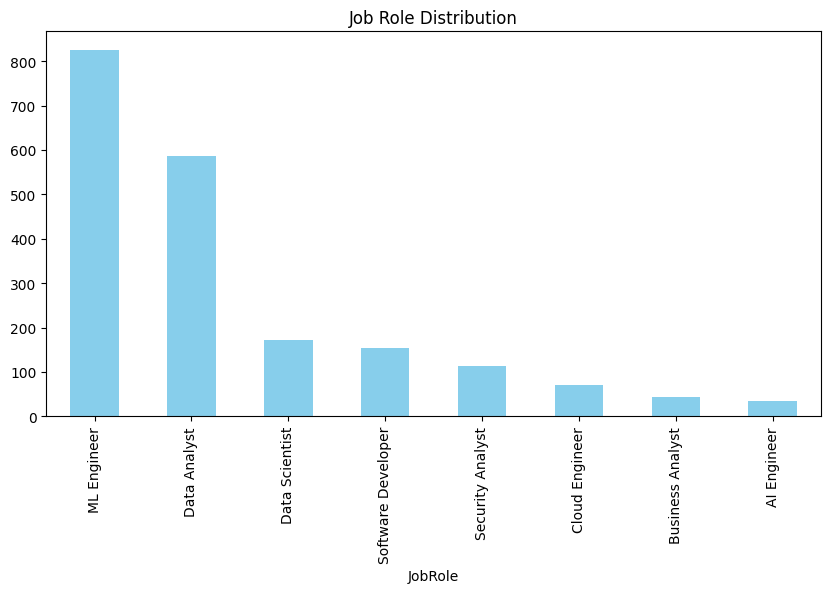


Categorical columns: ['Degree', 'Major', 'Skill1', 'Skill2', 'Certification', 'Internship', 'ExperienceLevel', 'JobRole']

Numerical columns: ['ExperienceYears', 'ProjectCount']


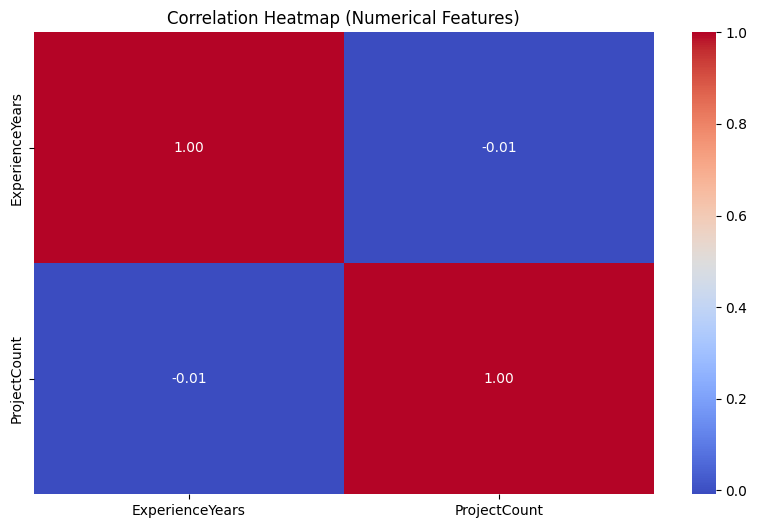

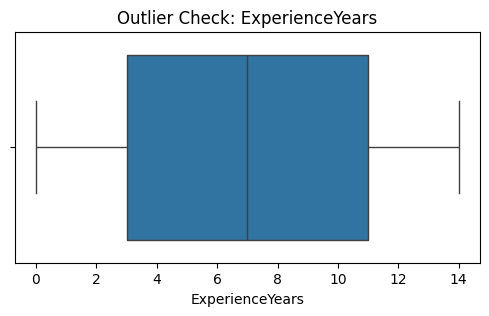

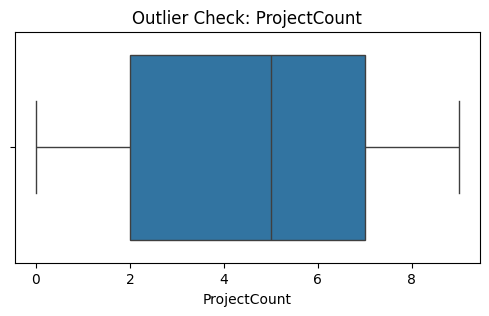

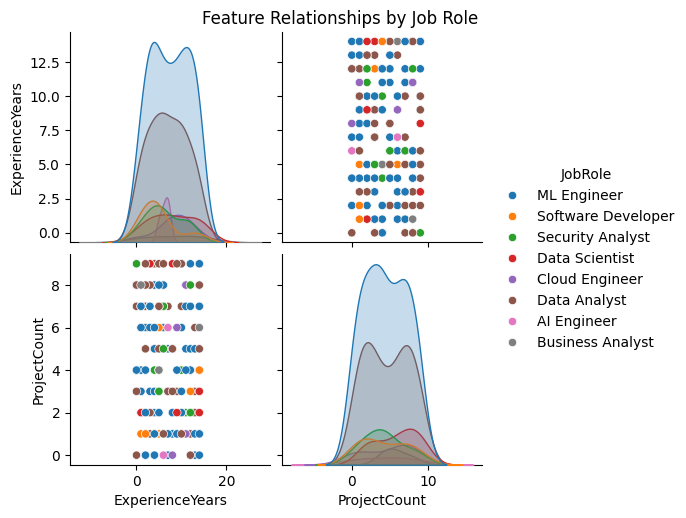

In [2]:
# ==========================================================
# 🔍 DATASET INSPECTION & QUALITY REPORT
# ==========================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load dataset
data_path = "/content/final_high_accuracy_job_dataset.csv"
df = pd.read_csv(data_path)

print("=====================================")
print("📊 DATASET OVERVIEW")
print("=====================================")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values per Column:\n", df.nunique())

# ✅ Detect duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# ✅ Basic statistics
print("\nDescriptive Statistics (Numerical):")
display(df.describe())

# ✅ Class distribution (target variable)
if "JobRole" in df.columns:
    print("\nTarget column distribution:")
    print(df["JobRole"].value_counts())
    df["JobRole"].value_counts().plot(kind='bar', figsize=(10,5), color='skyblue', title="Job Role Distribution")
    plt.show()

# ✅ Categorical features overview
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:", categorical_cols)

# ✅ Numerical features overview
numerical_cols = df.select_dtypes(exclude=['object']).columns.tolist()
print("\nNumerical columns:", numerical_cols)

# ✅ Correlation heatmap (numerical only)
if len(numerical_cols) > 1:
    plt.figure(figsize=(10,6))
    sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap (Numerical Features)")
    plt.show()

# ✅ Outlier detection
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()

# ✅ Pairplot (small sample to visualize feature relationships)
if len(numerical_cols) >= 2:
    sns.pairplot(df.sample(min(200, len(df))), hue="JobRole", diag_kind="kde")
    plt.suptitle("Feature Relationships by Job Role", y=1.02)
    plt.show()
